In [8]:
import pickle
import numpy as np
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from mpl_toolkits.mplot3d import Axes3D
from static_1Dfunction import *
from IPython.display import display, HTML
from matplotlib import cm
import seaborn
import matplotlib as matp
from matplotlib.gridspec import GridSpec

#display(HTML("<style>.jp-Cell { margin-left: -30% !important; margin-right: -30% !important; }</style>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
#import
dir_name=['hom','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9','n=1alt','n=2bis','n=3bis_1','n=3bis_2','n=4bis_1','n=4bis_2','n=4bis_3']
name_mode=['Homogeneous solution','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9','n=1 alternative','n=2 bis','n=3 bis_1','n=3 bis_2','n=4 bis_1','n=4bis_2','n=4bis_3']

P_mode_tot=[]
W_mode_tot=[]
O_mode_tot=[]
Rains_mode_tot=[]
Stab_mode_tot=[]
Lmb_mode_tot=[]

for i in range(len(dir_name)):
    #print('Saving files for '+dir_name[i])
    with open("L100/"+dir_name[i]+"/P_mode_tot.txt", "rb") as fp:
        P_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/W_mode_tot.txt", "rb") as fp:
        W_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/O_mode_tot.txt", "rb") as fp:
        O_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/Rains_mode_tot.txt", "rb") as fp:
        Rains_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/Stab_mode_tot.txt", "rb") as fp:
        Stab_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/Lmb_mode_tot.txt", "rb") as fp:
        Lmb_mode_tot.append(pickle.load(fp))
         
   
with open("L100/param.txt", "rb") as fp:   
    param = pickle.load(fp)


N_mode=len(P_mode_tot)
print(N_mode)

#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)*L/(2*np.pi)

17


In [10]:

# Colorblind 
color_mode=[]
color_mode.append('black')
seaborn.color_palette("colorblind")
for i in range(10):
    color_mode.append(seaborn.color_palette("colorblind")[i])

color_mode.append(seaborn.color_palette("dark")[1])
color_mode.append(seaborn.color_palette("dark")[2]) 
color_mode.append(seaborn.color_palette("dark")[3])  
color_mode.append(seaborn.color_palette("dark")[4])  
color_mode.append(seaborn.color_palette("dark")[5])
color_mode.append(seaborn.color_palette("dark")[6])



In [11]:
#print(P_mode_tot[6])
#print(Stab_mode_tot[6])
#print(name_mode)

print(np.ma.masked_where(Stab_mode_tot[0], Rains_mode_tot[0]))
print(np.ma.masked_where(Stab_mode_tot[3], Rains_mode_tot[3]))
print(np.ma.masked_where(Stab_mode_tot[6], Rains_mode_tot[6]))

[0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 0.3 0.31 0.32 0.33 0.34 0.35000000000000003 0.36 0.37 0.38 0.39 0.4
 0.41000000000000003 0.42 0.43 0.44 0.45 0.46 0.47000000000000003 0.48
 0.49 0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.5700000000000001 0.58 0.59 0.6
 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.6900000000000001
 0.7000000000000001 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8 0.81
 0.8200000000000001 0.8300000000000001 0.84 0.85 0.86 0.87 0.88 0.89 0.9
 0.91 0.92 0.93 0.9400000000000001 0.9500000000000001 0.96 0.97 0.98
 0.9801 0.9802 0.9803 0.9803999999999999 0.9804999999999999
 0.9805999999999999 0.9806999999999999 0.9807999999999999
 0.9808999999999999 0.9809999999999999 0.9810999999999999
 0.9811999999999999 0.9812999999999998 0.9813999999999998
 0.9814999999999998 0.9815999999999998 0.9816999999999998
 0.9817999999999998 0.9818999999999998 0.9819999999999998
 0.982099999

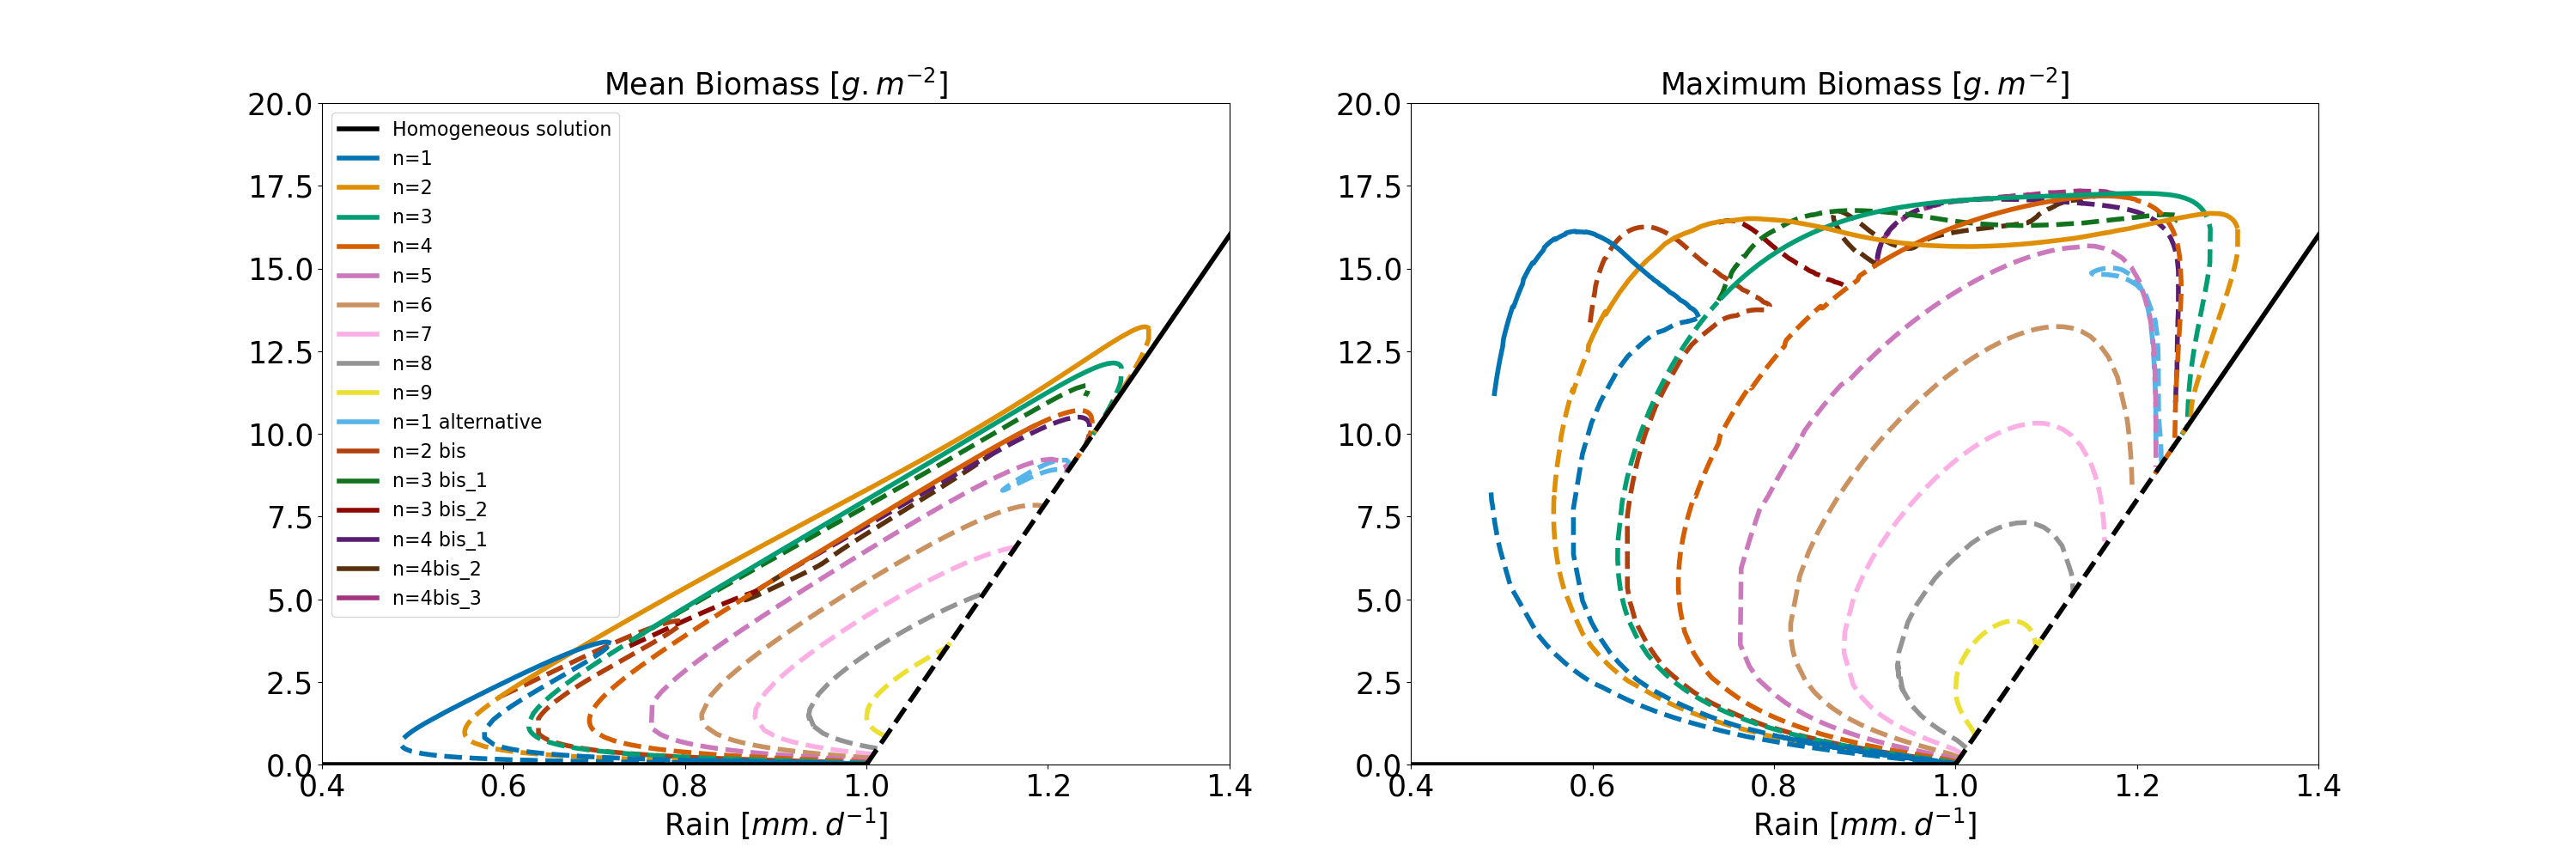

In [12]:
plt.rc('font', size=12) 
Zorder=-np.arange(0,N_mode)
fig,ax=plt.subplots(1,2,figsize=(30,10))
for i in range(N_mode):
    ax[0].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i],zorder=Zorder[i],linewidth=4)
    ax[0].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),markersize=4,color=color_mode[i],label=name_mode[i],linestyle='solid',zorder=Zorder[i],linewidth=4)
    ax[1].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i],zorder=Zorder[i],linewidth=4)
    ax[1].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),markersize=2,color=color_mode[i],label=name_mode[i],zorder=Zorder[i],linewidth=4)
ax[0].set_xlim(0.4,1.4)
ax[0].set_ylim(0,20)
ax[0].set_title('Mean Biomass $[g.m^{-2}]$',fontsize=25)
ax[0].set_xlabel('Rain $[mm.d^{-1}]$',fontsize=25)
ax[0].legend(fontsize=16)
ax[1].set_xlim(0.4,1.4)
ax[1].set_ylim(0,20)
ax[1].set_title('Maximum Biomass $[g.m^{-2}]$',fontsize=25)
ax[1].set_xlabel('Rain $[mm.d^{-1}$]',fontsize=25)
ax[0].tick_params(axis='both', which='major', labelsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25)


In [ ]:
rain=0.8
plt.rc('font', size=16) 
n_modes=[2,3,-4,-5]
fig,ax=plt.subplots(3,len(n_modes),figsize=(25,15))
for i in range(len(n_modes)):
    n_mode=n_modes[i]
    ind_01=selec_rain(rain,5,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
    #FFT
    #P_hat=np.fft.fftshift(np.fft.fft(P_mode_tot[n_mode][ind_01]))
    #k=np.fft.fftshift(np.fft.fftfreq(N,L/100))
    P_hat=1/N*(np.fft.fft(P_mode_tot[n_mode][ind_01]))[:int(N/2)]
    k=(np.fft.fftfreq(N,L/100))[:int(N/2)]
    lmb=1/k[1:]
    ax[0,i].plot(x,P_mode_tot[n_mode][ind_01],color='k',label='n=%d'%(n_mode))
    ax[1,i].plot(k,np.abs(P_hat),color='k',linestyle='none',marker='o')
    ax[2,i].plot(lmb,np.abs(P_hat)[1:])
    ax[0,i].set_title(name_mode[n_mode])
    ax[0,i].set_xlabel('$x$')
    ax[1,i].set_xlabel('$k$')
    ax[2,i].set_xlabel('$\lambda$')

plt.savefig('figure/realist/FFT_equi_R_%.2f.png'%(rain))

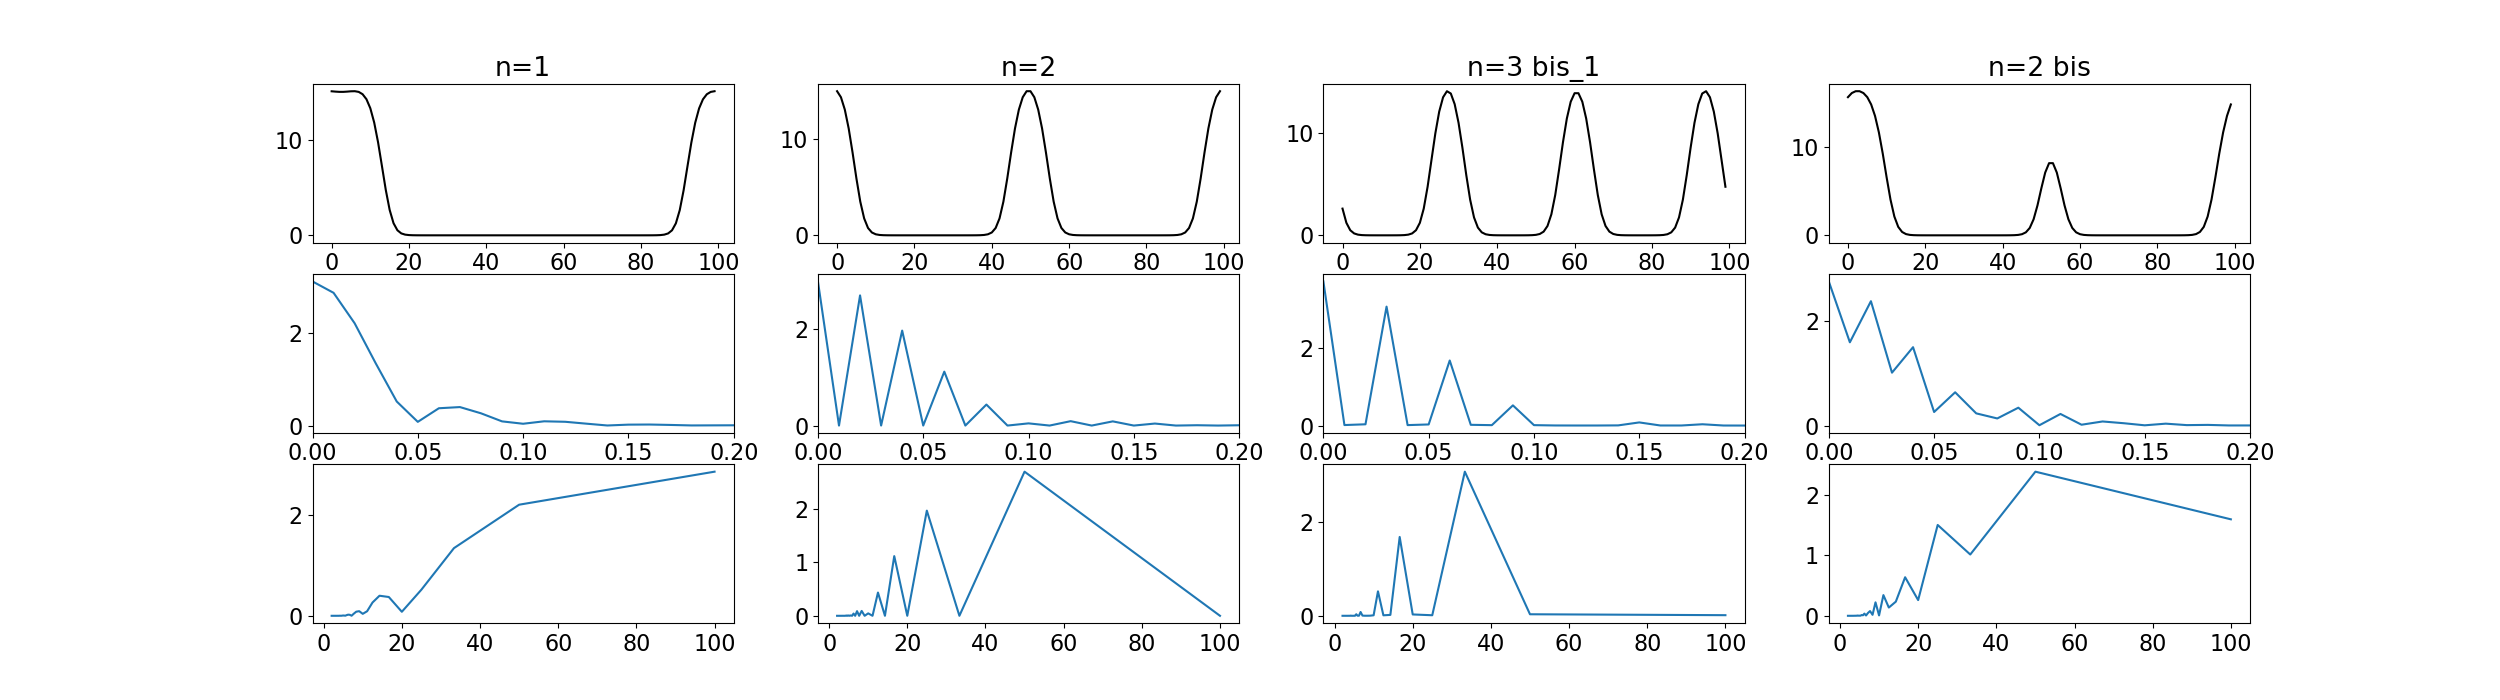

In [6]:
rain=0.65
n_modes=[1,2,-5,-6]
fig,ax=plt.subplots(3,len(n_modes),figsize=(25,7))
for i in range(len(n_modes)):
    n_mode=n_modes[i]
    ind_01=selec_rain(rain,2,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
    #FFT
    #P_hat=np.fft.fftshift(np.fft.fft(P_mode_tot[n_mode][ind_01]))
    #k=np.fft.fftshift(np.fft.fftfreq(N,L/100))
    P_hat=1/N*(np.fft.fft(P_mode_tot[n_mode][ind_01]))[:int(N/2)]
    k=(np.fft.fftfreq(N,L/100))[:int(N/2)]
    lmb=1/k[1:]
    ax[0,i].plot(x,P_mode_tot[n_mode][ind_01],color='k',label='n=%d'%(n_mode))
    ax[1,i].plot(k,np.abs(P_hat))
    ax[1,i].set_xlim((0,0.2))
    ax[2,i].plot(lmb,np.abs(P_hat)[1:])
    ax[0,i].set_title(name_mode[n_mode])


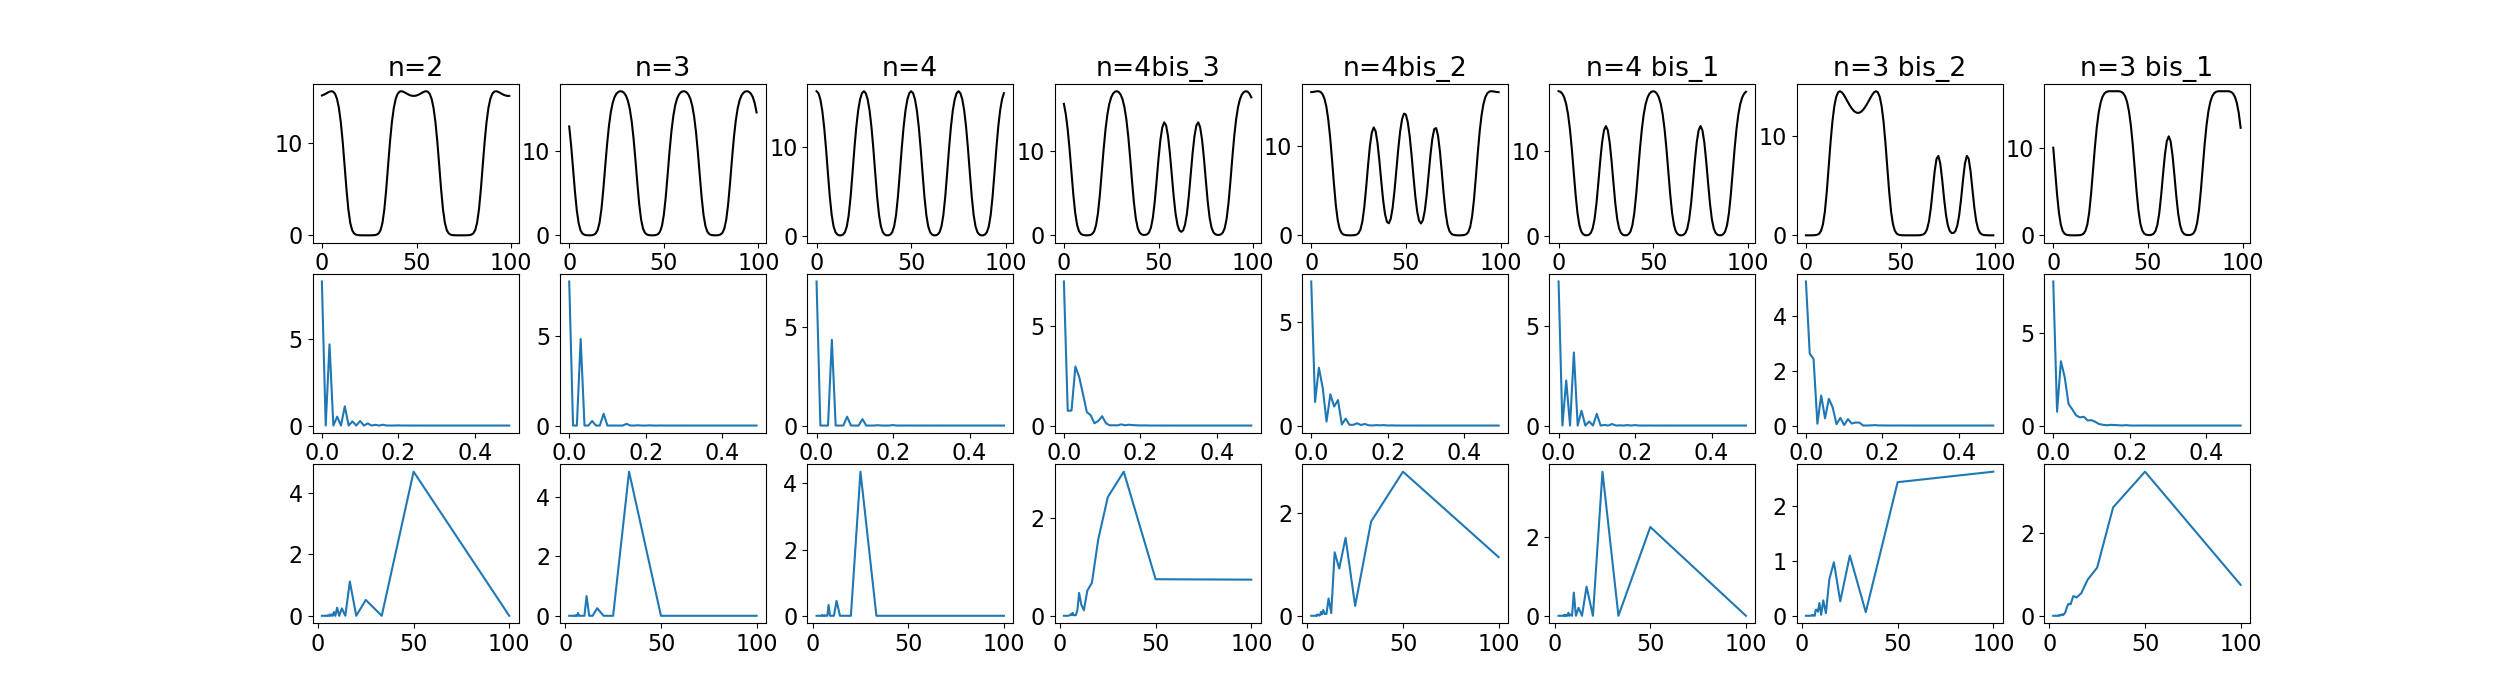

In [7]:
rain=1
n_modes=[2,3,4,-1,-2,-3,-4,-5]
fig,ax=plt.subplots(3,len(n_modes),figsize=(25,7))
for i in range(len(n_modes)):
    n_mode=n_modes[i]
    ind_01=selec_rain(rain,5,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
    #FFT
    #P_hat=np.fft.fftshift(np.fft.fft(P_mode_tot[n_mode][ind_01]))
    #k=np.fft.fftshift(np.fft.fftfreq(N,L/100))
    P_hat=1/N*(np.fft.fft(P_mode_tot[n_mode][ind_01]))[:int(N/2)]
    k=(np.fft.fftfreq(N,L/100))[:int(N/2)]
    lmb=1/k[1:]
    ax[0,i].plot(x,P_mode_tot[n_mode][ind_01],color='k',label='n=%d'%(n_mode))
    ax[1,i].plot(k,np.abs(P_hat))
    ax[2,i].plot(lmb,np.abs(P_hat)[1:])
    ax[0,i].set_title(name_mode[n_mode])

In [7]:
tmax=20000
dt=0.1
L=100

n_mode=3
rain=0.8

path="noise_tmax_%.1f_dt_%.1f_L_%.1f"%(tmax,dt,L)
path_veg="noise_tmax_%.1f_dt_%.1f_L_%.1f/realist/R_%.2f/n=%.d"%(tmax,dt,L,rain,n_mode)

with open("/Param.txt", "rb") as fp:   
    Param = pickle.load(fp)

with open("/axes.txt", "rb") as fp:   
    axes = pickle.load(fp)

sigma=Param[0] #sigma
lmb_t=Param[1] #lmb_t
lmb_s=Param[2] #lmb_s
t=axes[0]
x=axes[1]

n_sigma=np.shape(sigma)[0]
n_lmb_t=np.shape(lmb_t)[0]
n_lmb_s=np.shape(lmb_s)[0]

M=np.shape(t)[0]
N=np.shape(x)[0]

tmax=(t[1]-t[0])*M
L=(x[1]-x[0])*N

n_real=15
# Diagnostic of the noise
ind_lmb_t_P=2
ind_lmb_s_O=-1
sigma_O=0.1

ind_lmb_t=6
ind_lmb_s=4
ind_sigma=0


file="/VegMod_P_sig_%.1f_lmb_t_%.1f_lmb_s_%.1f_O_sig_%.1f_lmb_t_%.1f_lmb_s_inf_modif.txt"%(sigma[ind_sigma],lmb_t[ind_lmb_t_P],lmb_s[ind_lmb_s],sigma_O,lmb_t[ind_lmb_t])




with open(file, "rb") as fp:   
    Sol1 = (pickle.load(fp))

    
print('Solution loaded')
print('B: lmb_t=%.1f , lmb_s=%.1f'%(lmb_t[ind_lmb_t_P],lmb_s[ind_lmb_s]))
print('O: lmb_t=%.1f , lmb_s=inf'%(lmb_t[ind_lmb_t]))
rain=Sol1[0][-2][0]
print(rain)

# Diagnostic of the noise
ind_lmb_t_P=2
ind_lmb_s_O=-1


ind_lmb_t=0
ind_lmb_s=3
ind_sigma=0


file="/VegMod_P_sig_%.1f_lmb_t_%.1f_lmb_s_%.1f_O_sig_%.1f_lmb_t_%.1f_lmb_s_inf_modif.txt"%(sigma[ind_sigma],lmb_t[ind_lmb_t_P],lmb_s[ind_lmb_s],sigma_O,lmb_t[ind_lmb_t])




with open(file, "rb") as fp:   
    Sol2 = (pickle.load(fp))

    
print('Solution loaded')
print('B: lmb_t=%.1f , lmb_s=%.1f'%(lmb_t[ind_lmb_t_P],lmb_s[ind_lmb_s]))
print('O: lmb_t=%.1f , lmb_s=inf'%(lmb_t[ind_lmb_t]))
rain=Sol2[0][-2][0]
print(rain)


Solution loaded
B: lmb_t=1.0 , lmb_s=15.0
O: lmb_t=10000.0 , lmb_s=inf
0.8028908764508444
Solution loaded
B: lmb_t=1.0 , lmb_s=10.0
O: lmb_t=0.0 , lmb_s=inf
0.8028908764508444


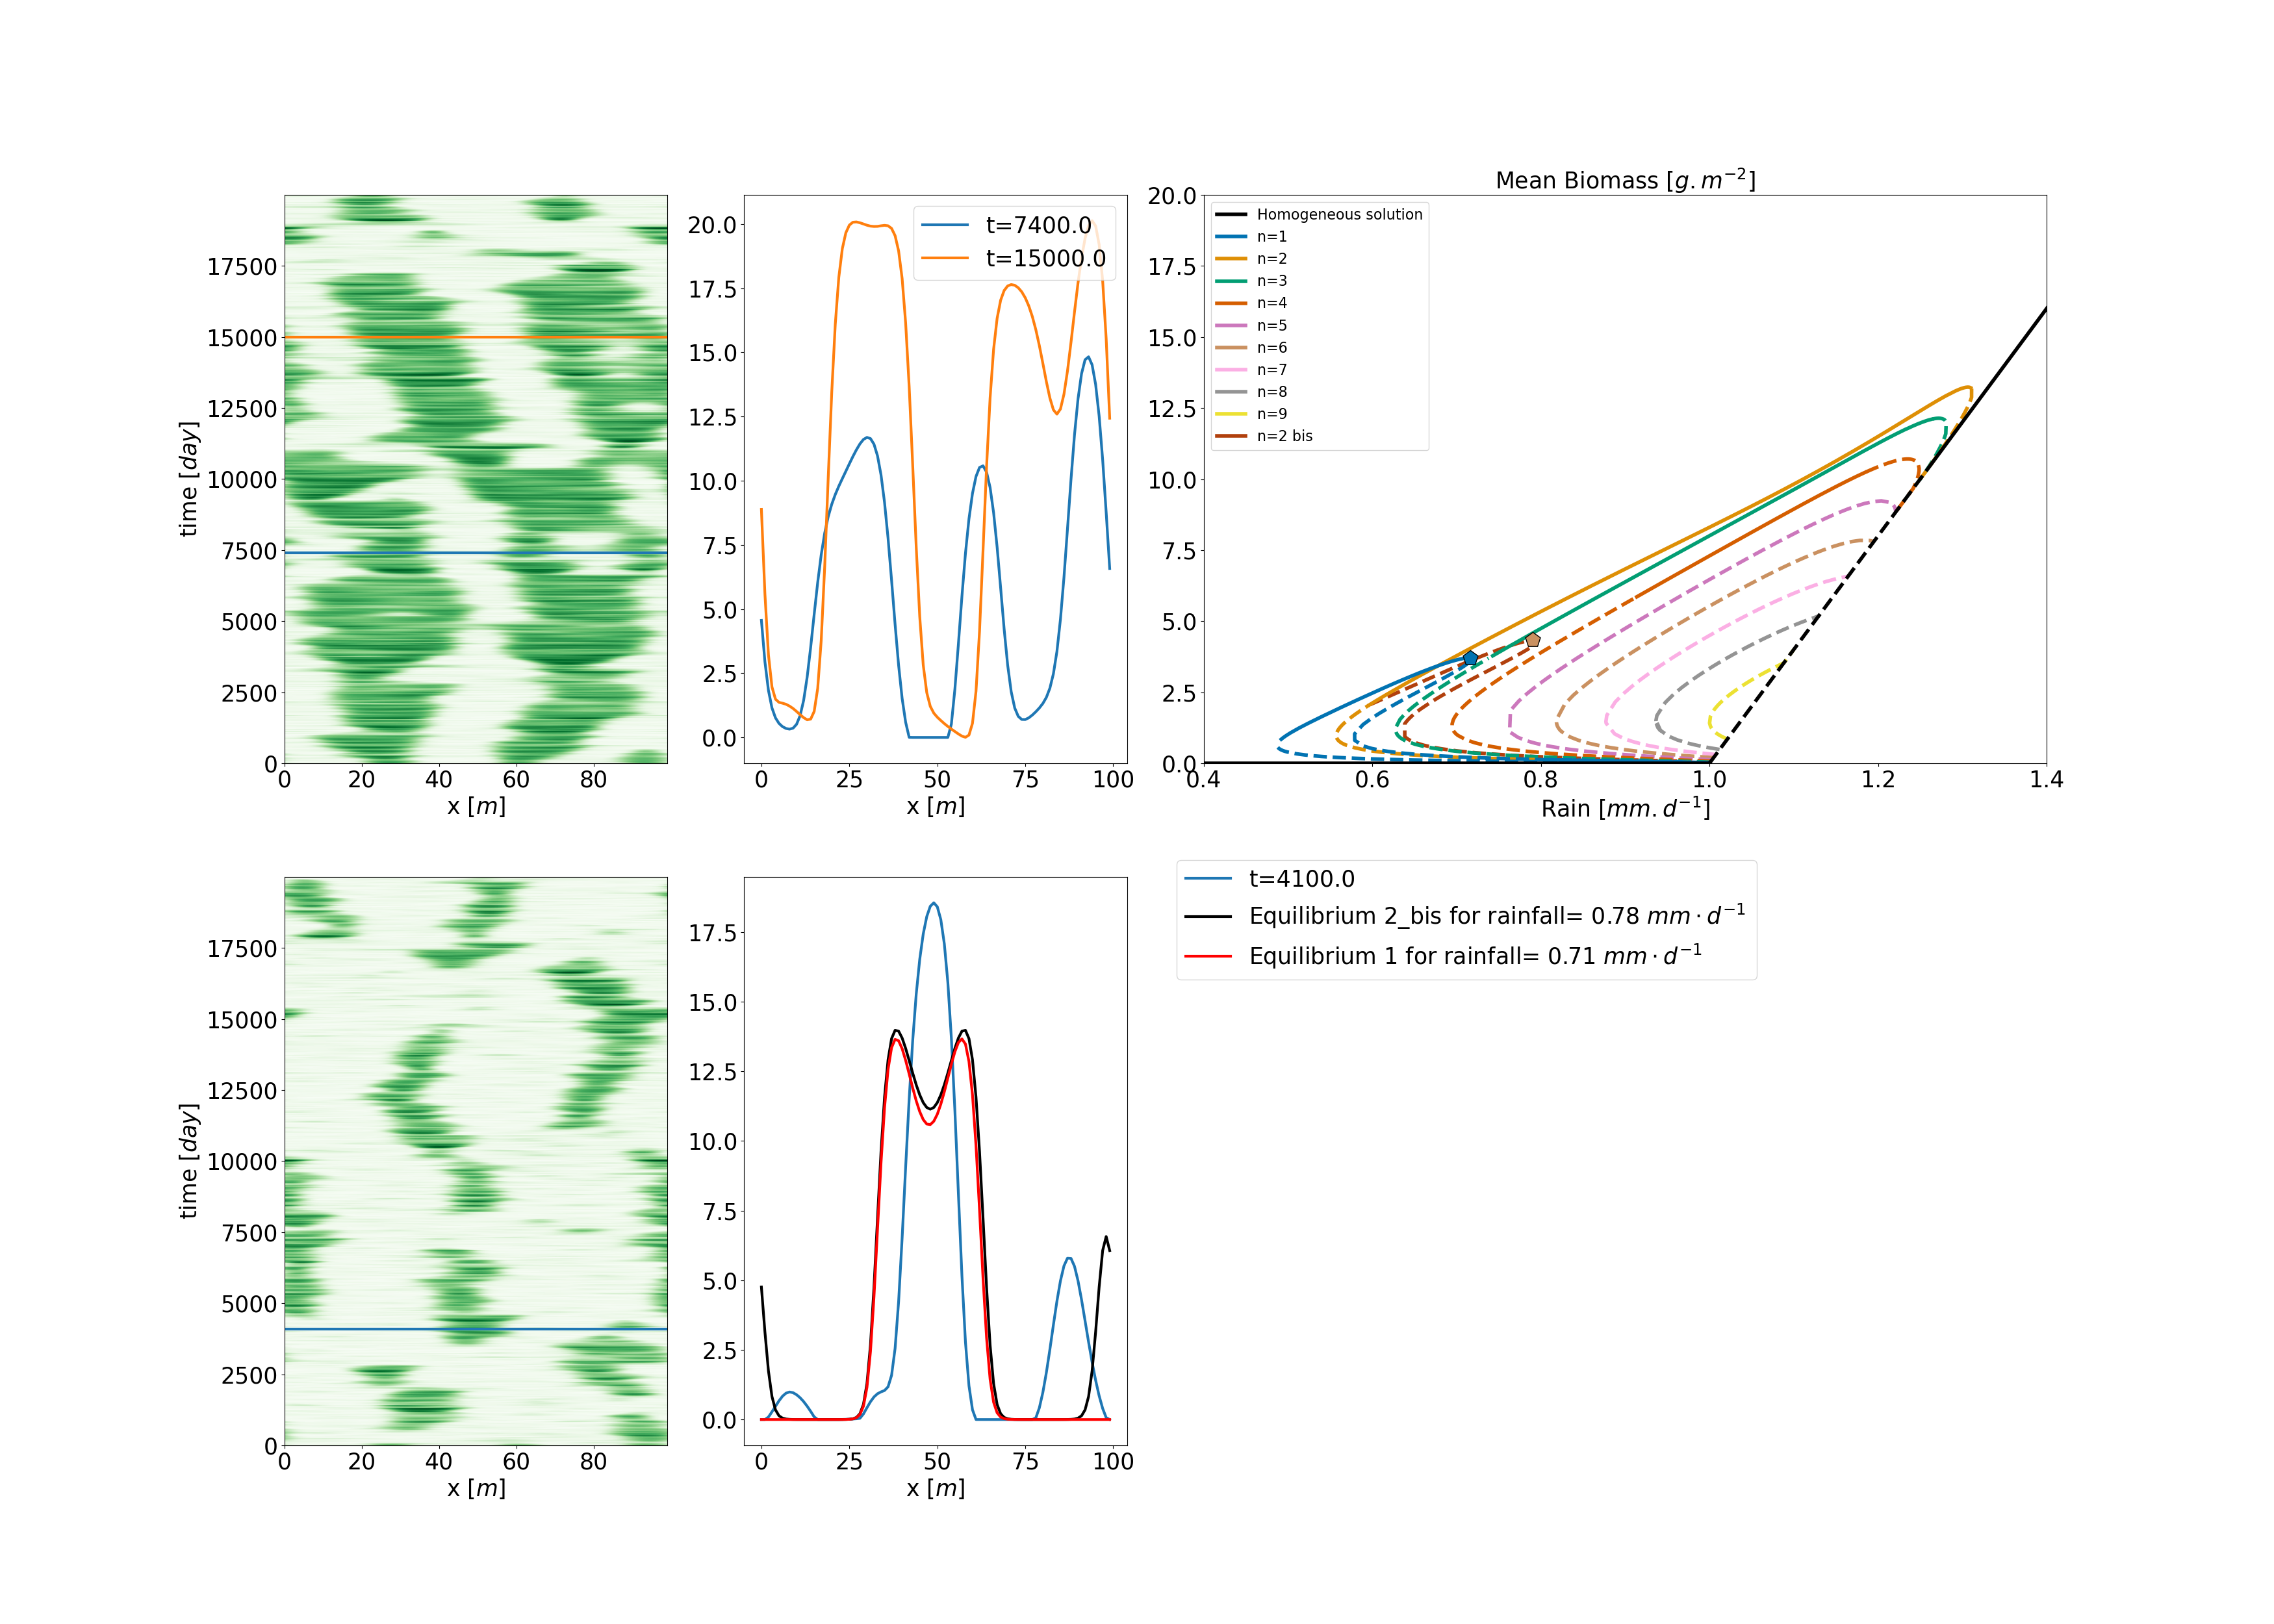

In [16]:
ind_real=6 #6

plt.rc('font', size=25) 
Zorder=-np.arange(0,N_mode)

fig=plt.figure(figsize=(35,25))
#fig.suptitle('L= %.1f m, R = %.2f'%(L,rain),fontsize=16)
gs = GridSpec(2, 4, width_ratios=[2, 2, 2,2], height_ratios=[1, 1])
# Create axes for the first row
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0:1, 2:4])

# Create axes for the second row
ax4 = plt.subplot(gs[1, 0])
ax5 = plt.subplot(gs[1, 1])

n_modes=[0,1,2,3,4,5,6,7,8,9,11]
for i in n_modes:
    ax3.plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i],zorder=Zorder[i],linewidth=4)
    ax3.plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),markersize=4,color=color_mode[i],label=name_mode[i],linestyle='solid',zorder=Zorder[i],linewidth=4)
ax3.set_xlim(0.4,1.4)
ax3.set_ylim(0,20)
ax3.set_title('Mean Biomass $[g.m^{-2}]$',fontsize=25)
ax3.set_xlabel('Rain $[mm.d^{-1}]$',fontsize=25)
ax3.legend(fontsize=16)
#Find the solution to show along the branches 
rain1=0.79
n_mode=11
ind_01=selec_rain(rain1,2,5,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
ax3.scatter(rain1,np.mean(P_mode_tot[n_mode][ind_01]),marker='p',s=300,color=color_mode[-11],edgecolors= "black")
rain2=0.777
n_mode=1
ind_02=selec_rain(rain2,2,5,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
ax3.scatter(Rains_mode_tot[n_mode][ind_02],np.mean(P_mode_tot[n_mode][ind_02]),marker='p',s=300,color=color_mode[1],edgecolors= "black")

xx,tt=np.meshgrid(x,t)


c=np.linspace(-.001,np.max(np.max(Sol1[ind_real][0])),201)
contB=ax1.contourf(xx,tt,Sol1[ind_real][0],c,cmap=cm.Greens)
#cax = plt.axes([0.95, 0.1,0.01,0.5])    
#ticks_cbar=np.linspace(0,int(np.max(np.max(Sol1[ind_real][0]))),5)
#cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
#cbar.ax.set_title('Biomass $[g.m^{-2}]$')
ax1.set_xlabel('x $[m]$')
ax1.set_ylabel('time $[day]$')

time_shown=[7400,15000]

for j in range(len(time_shown)):
    ax2.plot(x,Sol1[ind_real][0][selec_time(time_shown[j],t)],linewidth=3,label='t=%.1f'%(time_shown[j]))
    ax1.plot(x,np.ones(np.shape(x))*t[selec_time(time_shown[j],t)],linewidth=3)

ax2.set_xlabel('x $[m]$')
ax2.legend()

ind_real=3

c=np.linspace(-.001,np.max(np.max(Sol2[ind_real][0])),201)
contB=ax4.contourf(xx,tt,Sol2[ind_real][0],c,cmap=cm.Greens)
#cax = plt.axes([0.02, 0.25,0.01,0.5])    
#ticks_cbar=np.linspace(0,int(np.max(np.max(Sol2[ind_real][0]))),5)
#cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
#cbar.ax.set_title('Biomass $[g.m^{-2}]$')
ax4.set_xlabel('x $[m]$')
ax4.set_ylabel('time $[day]$')


time_shown=[4100]

for j in range(len(time_shown)):
    ax5.plot(x,Sol2[ind_real][0][selec_time(time_shown[j],t)],linewidth=3,label='t=%.1f'%(time_shown[j]))
    ax4.plot(x,np.ones(np.shape(x))*t[selec_time(time_shown[j],t)],linewidth=3)

ax5.set_xlabel('x $[m]$')
#ax5.set_ylabel('B $[g.m^{-2}]$')

rain_2bis=0.79
#rain=0.9227

R_2bis_1,P_2bis_1,W_2bis_1,O_2bis_1=find_next_solution(rain_2bis,-6,2,6,L,param,Rains_mode_tot,P_mode_tot,W_mode_tot,O_mode_tot)
P_2bis_1_perm=period_perm(P_2bis_1,55)
ax5.plot(x,P_2bis_1_perm,color='black',linewidth=3,label='Equilibrium 2_bis for rainfall= 0.78 $mm \cdot d^{-1}$ ')

rain_1=0.715

R_1,P_1,W_1,O_1=find_next_solution(rain_1,1,1,6,L,param,Rains_mode_tot,P_mode_tot,W_mode_tot,O_mode_tot)
P_1_perm=period_perm(P_1,55)
ax5.plot(x,P_1_perm,color='red',linewidth=3,label='Equilibrium 1 for rainfall= 0.71 $mm \cdot d^{-1}$ ')
ax5.legend(bbox_to_anchor=(1.1, 1.05))

plt.savefig("figure/MS/noise+MState.png",dpi=500,bbox_inches='tight')


In [10]:
tmax=20000
dt=0.1
L=100

n_mode=3
rain=0.8

path="noise_tmax_%.1f_dt_%.1f_L_%.1f"%(tmax,dt,L)
path_veg="noise_tmax_%.1f_dt_%.1f_L_%.1f/realist/R_%.2f/n=%.d"%(tmax,dt,L,rain,n_mode)

with open("/Param.txt", "rb") as fp:   
    Param = pickle.load(fp)

with open("/axes.txt", "rb") as fp:   
    axes = pickle.load(fp)

sigma=Param[0] #sigma
lmb_t=Param[1] #lmb_t
lmb_s=Param[2] #lmb_s
t=axes[0]
x=axes[1]

n_sigma=np.shape(sigma)[0]
n_lmb_t=np.shape(lmb_t)[0]
n_lmb_s=np.shape(lmb_s)[0]

M=np.shape(t)[0]
N=np.shape(x)[0]

tmax=(t[1]-t[0])*M
L=(x[1]-x[0])*N

n_real=15
# Diagnostic of the noise
ind_lmb_t_P=2
ind_lmb_s_O=-1
sigma_O=0.1

ind_lmb_t=2
ind_lmb_s=3
ind_sigma=0


file="/VegMod_P_sig_%.1f_lmb_t_%.1f_lmb_s_%.1f_O_sig_%.1f_lmb_t_%.1f_lmb_s_inf_modif.txt"%(sigma[ind_sigma],lmb_t[ind_lmb_t_P],lmb_s[ind_lmb_s],sigma_O,lmb_t[ind_lmb_t])

Sols=[]


with open(file, "rb") as fp:   
    Sols.append(pickle.load(fp))

    
print('Solution loaded')
print('B: lmb_t=%.1f , lmb_s=%.1f'%(lmb_t[ind_lmb_t_P],lmb_s[ind_lmb_s]))
print('O: lmb_t=%.1f , lmb_s=inf'%(lmb_t[ind_lmb_t]))
rain=Sol1[0][-2][0]
print(rain)

# Diagnostic of the noise
ind_lmb_t_P=2
ind_lmb_s_O=-1


ind_lmb_t=3
ind_sigma=0


file="/VegMod_P_sig_%.1f_lmb_t_%.1f_lmb_s_%.1f_O_sig_%.1f_lmb_t_%.1f_lmb_s_inf_modif.txt"%(sigma[ind_sigma],lmb_t[ind_lmb_t_P],lmb_s[ind_lmb_s],sigma_O,lmb_t[ind_lmb_t])




with open(file, "rb") as fp:   
    Sols.append(pickle.load(fp))

    
print('Solution loaded')
print('B: lmb_t=%.1f , lmb_s=%.1f'%(lmb_t[ind_lmb_t_P],lmb_s[ind_lmb_s]))
print('O: lmb_t=%.1f , lmb_s=inf'%(lmb_t[ind_lmb_t]))
rain=Sols[-1][0][-2][0]
print(rain)


# Diagnostic of the noise
ind_lmb_t_P=2
ind_lmb_s_O=-1


ind_lmb_t=-2
ind_sigma=0


file="/VegMod_P_sig_%.1f_lmb_t_%.1f_lmb_s_%.1f_O_sig_%.1f_lmb_t_%.1f_lmb_s_inf_modif.txt"%(sigma[ind_sigma],lmb_t[ind_lmb_t_P],lmb_s[ind_lmb_s],sigma_O,lmb_t[ind_lmb_t])




with open(file, "rb") as fp:   
    Sols.append(pickle.load(fp))

    
print('Solution loaded')
print('B: lmb_t=%.1f , lmb_s=%.1f'%(lmb_t[ind_lmb_t_P],lmb_s[ind_lmb_s]))
print('O: lmb_t=%.1f , lmb_s=inf'%(lmb_t[ind_lmb_t]))
rain=Sols[-1][0][-2][0]
print(rain)

# Diagnostic of the noise
ind_lmb_t_P=2
ind_lmb_s_O=-1


ind_lmb_t=-1
ind_sigma=0


file="/VegMod_P_sig_%.1f_lmb_t_%.1f_lmb_s_%.1f_O_sig_%.1f_lmb_t_%.1f_lmb_s_inf_modif.txt"%(sigma[ind_sigma],lmb_t[ind_lmb_t_P],lmb_s[ind_lmb_s],sigma_O,lmb_t[ind_lmb_t])




with open(file, "rb") as fp:   
    Sols.append(pickle.load(fp))

    
print('Solution loaded')
print('B: lmb_t=%.1f , lmb_s=%.1f'%(lmb_t[ind_lmb_t_P],lmb_s[ind_lmb_s]))
print('O: lmb_t=%.1f , lmb_s=inf'%(lmb_t[ind_lmb_t]))
rain=Sols[-1][0][-2][0]
print(rain)


Solution loaded
B: lmb_t=1.0 , lmb_s=10.0
O: lmb_t=1.0 , lmb_s=inf
0.8028908764508444
Solution loaded
B: lmb_t=1.0 , lmb_s=10.0
O: lmb_t=10.0 , lmb_s=inf
0.8028908764508444
Solution loaded
B: lmb_t=1.0 , lmb_s=10.0
O: lmb_t=1000.0 , lmb_s=inf
0.8028908764508444
Solution loaded
B: lmb_t=1.0 , lmb_s=10.0
O: lmb_t=10000.0 , lmb_s=inf
0.8028908764508444


In [11]:
ind_real=12

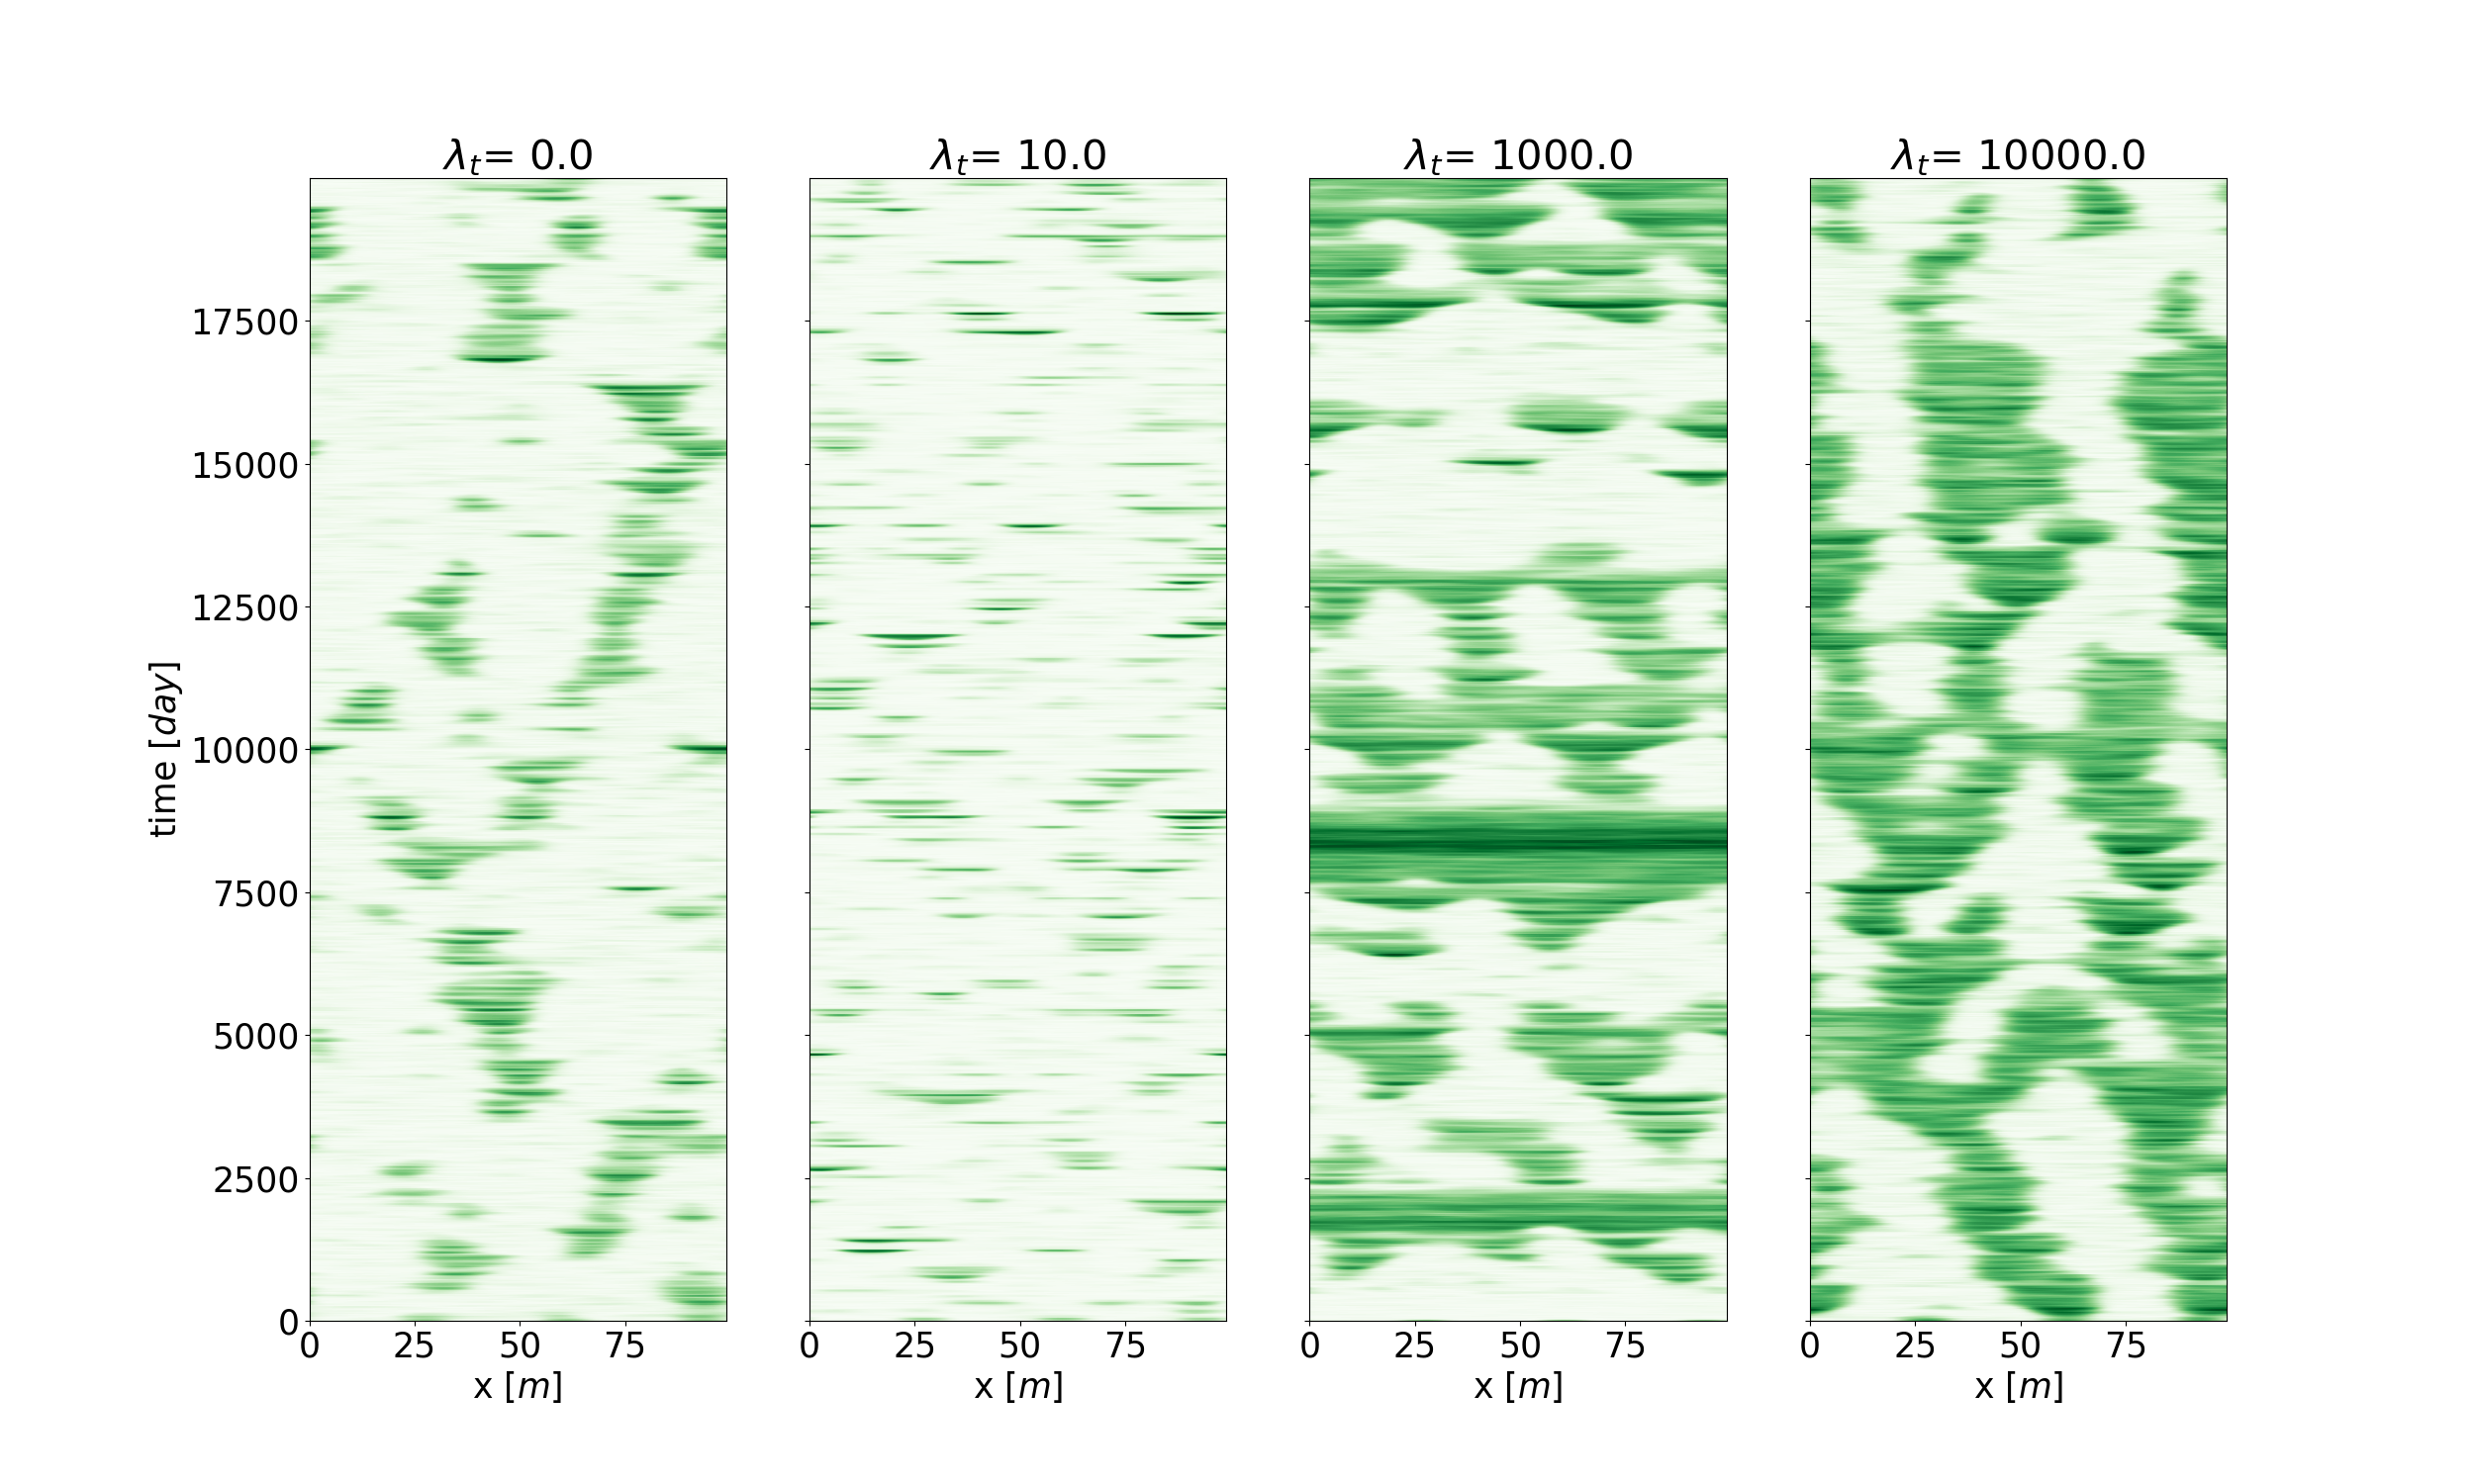

In [13]:
xx,tt=np.meshgrid(x,t)

lists_lmb_t=[0,3,-2,-1]
list_ind_real=[3,0,9,6]
fig,axs=plt.subplots(1,4,figsize=(25,15),sharey=True)

axs[0].set_ylabel('time $[day]$')
axs[0].set_xlabel('x $[m]$')
for i in range(len(Sols)):
    c=np.linspace(-.001,np.max(np.max(Sols[i][list_ind_real[i]][0])),201)
    contB=axs[i].contourf(xx,tt,Sols[i][list_ind_real[i]][0],c,cmap=cm.Greens)
    axs[i].set_xlabel('x $[m]$')
    axs[i].set_title('$\lambda_{t}$= %.1f'%(lmb_t[lists_lmb_t[i]]))
    


#cax = plt.axes([0.95, 0.25,0.01,0.5])    
#ticks_cbar=np.linspace(0,int(np.max(np.max(Sols[0][ind_real][0]))),5)
#cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
plt.savefig("figure/realist/examples.png",dpi=500,bbox_inches='tight')
